In [2]:
import pandas as pd
import matplotlib.pyplot as plt
elenco = pd.read_csv("data/cast.csv")

In [4]:
elenco.sample(5)

,title,year,name,type,character,n
2790884,Moor-Monster!,2014,Romy Glasel,actress,Carrie Cunningham,6.0
347511,I Could Never Be Your Woman,2007,David Cassidy,actor,Himself,NaN
3254777,A.B. Normal College (Todo na 'yan! Kulang pa '...,2003,Rufa Mae Quinto,actress,Miss Yulo,4.0
2858112,Amor Voraz,1984,Corn?lia Herr,actress,Mariana,4.0
2730269,A poutru oni prosnulis,2003,Dasha Fatina,actress,Masha,24.0


In [65]:
e = elenco.groupby(["year", "type"]).size()
print(e[1999])
e[(1999 , "actor")]

type
actor      32396
actress    16469
dtype: int64


32396

In [55]:
e = elenco.groupby(["year", "type"]).size().unstack("type")
e.fillna(0, inplace = True)
e = e.astype({"actor": "int16", "actress": "int16"})
e.sample(10)

type,actor,actress
year,,
1965,12480,5225
2022,10,7
1967,13378,5656
1999,32396,16469
1946,13901,4711
1911,135,63
2000,-32192,17469
2021,16,6
1944,15059,5075


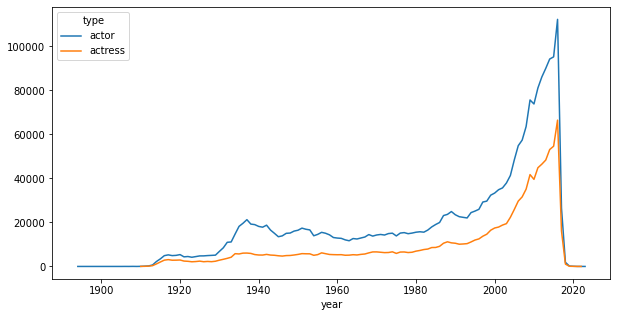

In [11]:
# Graficar en numero de papeles de actores cada año
# y el numero de papeles para actrices cada año

e = elenco
e.groupby(["year", "type"]).size().unstack("type").plot(figsize=(10, 5))


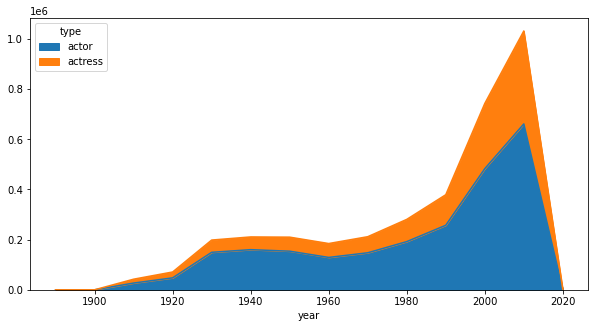

In [21]:
# El mismo grafico anterior pero categorizado por decada y
# con un grafico de area
e = elenco
e = e.groupby([e.year // 10 * 10, "type"]).size()
e = e.unstack("type")
e.plot(kind="area", figsize=(10, 5))


type  actor  actress
year                
1894    2.0      1.0
1900    2.0      NaN
1905    1.0      NaN
1906   14.0      3.0
1907    5.0      NaN


year
1894    66.666667
1900          NaN
1905          NaN
1906    82.352941
1907          NaN
          ...    
2019    67.938931
2020    66.666667
2021    72.727273
2022    58.823529
2023          NaN
Length: 121, dtype: float64

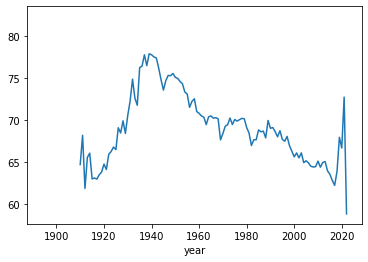

In [3]:
# Graficar el porcentaje de papeles que han sido 
# actores cada año en la historia de la filmografia
e = elenco
e = e.groupby(["year", "type"]).size()
e = e.unstack("type")
e = e.actor / (e.actor + e.actress) * 100
e.plot()
e

In [6]:
e = elenco
e = e.groupby(["year", "type"]).size()
e = e.unstack("type")
e.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN


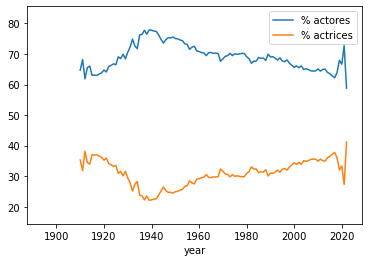

In [79]:
# Graficar el porcentaje de papeles que han sido 
# actores cada año en la historia de la filmografia
# junto al mismo porcentaje pero de actrices
e = elenco
e = e.groupby(["year", "type"]).size().unstack("type")
(e.actor / (e.actor + e.actress) * 100).plot(label = "% actores")
(e.actress / (e.actor + e.actress) * 100).plot(label = "% actrices")
plt.legend()

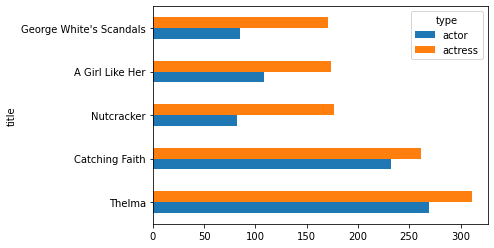

In [107]:
# Encontrar 5 peliculas de la historia que tengan mas actrices que actores
e = elenco.groupby([elenco.title, elenco.type]).size()
e = e.unstack("type")
e[(e.actor < e.actress)].sort_values(by = "actress", ascending = False).head().plot(kind = "barh")

In [66]:
df = pd.DataFrame({
    "mes": ["ene", "feb", "mar", "abr"],
    "ventas": [17, 26, 11, 9]
})
df

,mes,ventas
0,ene,17
1,feb,26
2,mar,11
3,abr,9


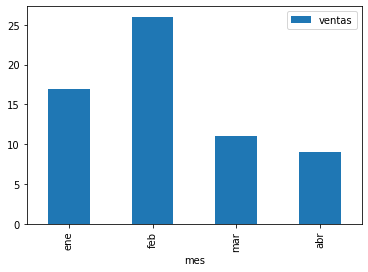

In [68]:
df.plot.bar("mes", "ventas")

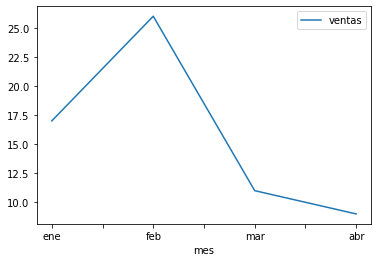

In [76]:
df.plot.line(x = "mes")

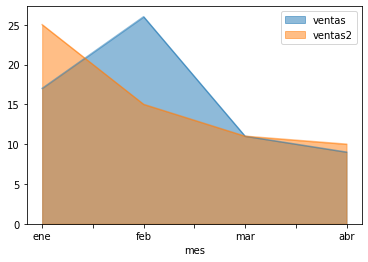

In [93]:
df["ventas2"] = [25, 15, 11, 10]
df.plot.area(x="mes", stacked=False)